<a href="https://colab.research.google.com/github/GS-THE-HACKER/Diabetes-Prediction/blob/main/DDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

#Ignore warnings
warnings.filterwarnings('ignore')

# **Data Collection**

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=names)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


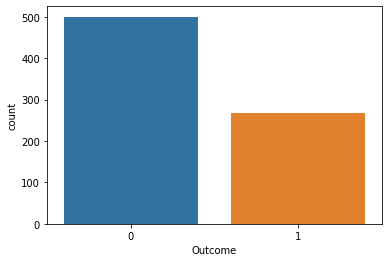

In [ ]:
#Plotting the distribution of Outcome
sns.countplot(x= 'Outcome', data = df)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

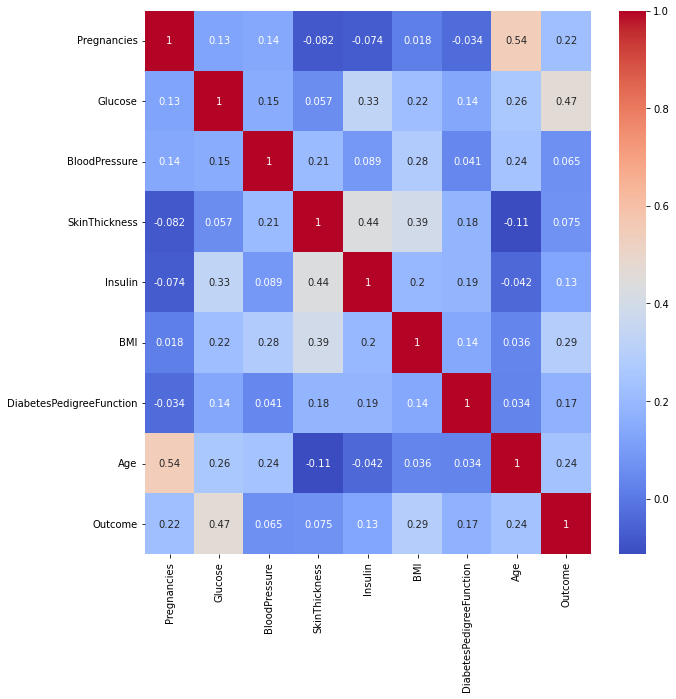

In [ ]:
#Correlation matrix to show correlarion between two variables
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="coolwarm")

# **Data Cleaning**

In [ ]:
#Check whether dataset has any null values or empty values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Feature matrix, Taking all our independent columns into single array and dependent columns into another array 
x = df.iloc[: , :-1].values            #Independent matrix
y = df.iloc[: , -1].values             #dependent matrix

In [ ]:
x.shape

(768, 8)

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# **Exploratory Data Analysis**

Factors that plays major role in Diabetes is Glucose, BMI, Insulin, DiabetesPedigreeFunction and Age.

We can easily identify these factors by using correlation graph.

Text(0.5, 1.0, 'Glucose')

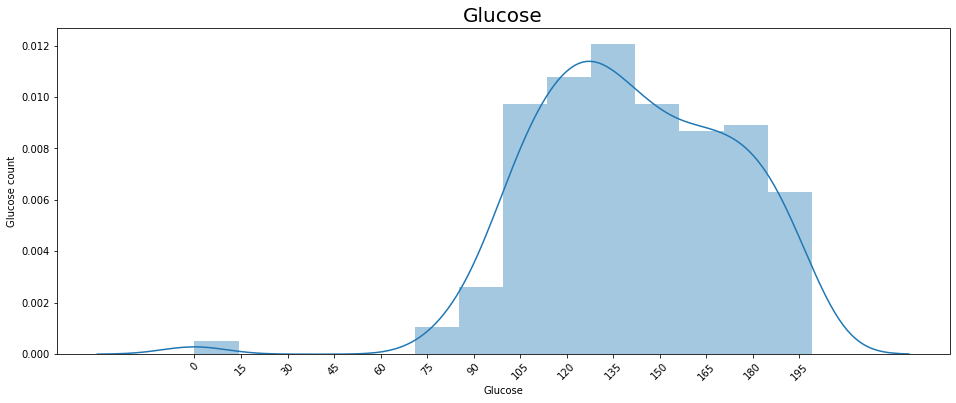

In [ ]:
#Glucose
fig = plt.figure(figsize =(16,6))

sns.distplot(df["Glucose"][df["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

Text(0.5, 1.0, 'Insulin')

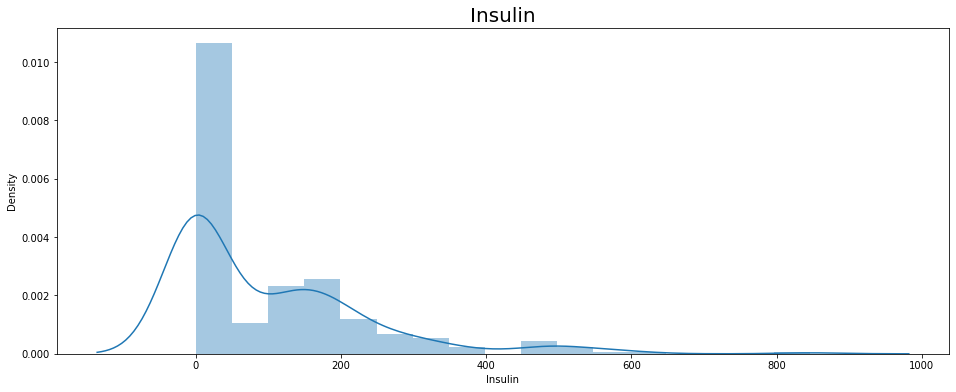

In [ ]:
#Insulin

fig = plt.figure(figsize = (16,6))

sns.distplot(df["Insulin"][df["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

Text(0.5, 1.0, 'BMI')

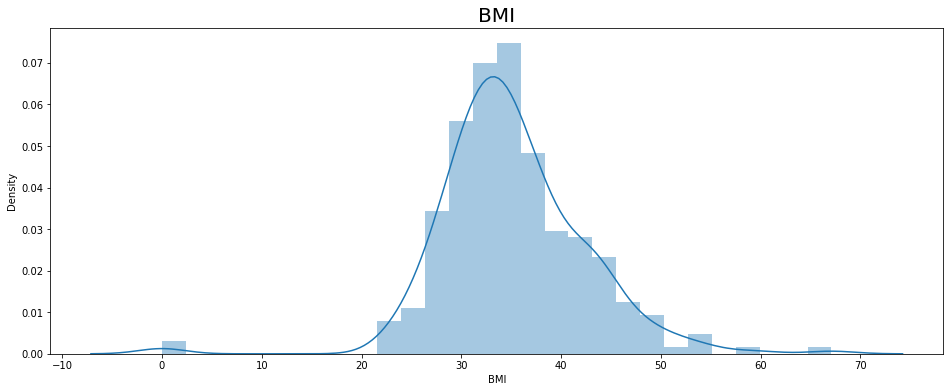

In [ ]:
#BMI for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(df["BMI"][df["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

Text(0.5, 1.0, 'diabetespedigreefunction')

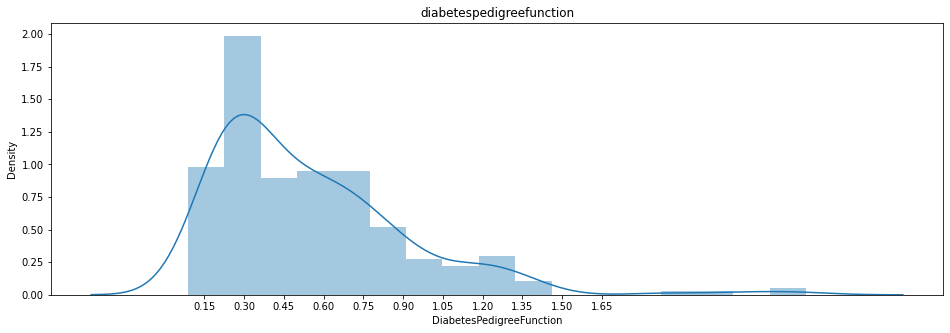

In [ ]:
#diabeticpedigreefunction for diabetic
fig = plt.figure(figsize = (16,5))
sns.distplot(df["DiabetesPedigreeFunction"][df["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

Text(0.5, 1.0, 'Age')

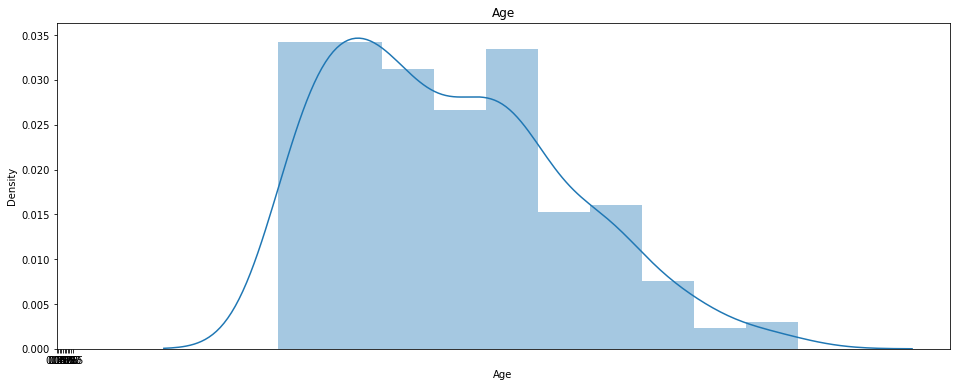

In [ ]:
fig = plt.figure(figsize = (16,6))

sns.distplot(df["Age"][df["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

In [ ]:
#Remove the unwanted columns
x = df.drop(["Pregnancies","BloodPressure","SkinThickness","Outcome"],axis = 1)
y = df.iloc[:,-1]

***Splitting Dataset***

In [ ]:
#splitting dataset into training set and test set
#test_size 0.2 means for testing data 20% and training data 80%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
x_train.shape     #80% of original dataset (769,9) after removing unnecceasry data

(614, 5)

In [ ]:
x_test.shape     #20% of original dataset (769,9) after removing unnecceasry data

(154, 5)

In [ ]:
#Feature Scaling - To standardize the independent features present in the data in a fixed range.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.91569367,  0.3736349 ,  0.37852648,  0.67740401,  1.69955804],
       [-0.75182191, -0.69965674, -0.50667229, -0.07049698, -0.96569189],
       [ 1.38763205,  5.09271083,  2.54094063, -0.11855487, -0.88240283],
       ...,
       [-0.84620959, -0.69965674, -0.94927168, -0.95656442, -1.04898095],
       [-1.12937261, -0.69965674, -0.26640405, -0.50001442,  0.11706589],
       [ 0.47521786, -0.69965674, -4.07275877,  0.52121586,  2.94889395]])

# **Model Building**

***K Nearest Neighbors Classifier***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =25, metric = 'minkowski') 
#n_neighbors is 25 bcoz for x_train we got 614 which is near to 25^2
#metric means on what factor choosing so as its KNN so our metric is minkowski i.e., distance
knn.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(knn.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(knn.score(x_test, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.81


In [ ]:
#Predicting the data
knn_y_pred = knn.predict(x_test)

In [ ]:
knn_y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

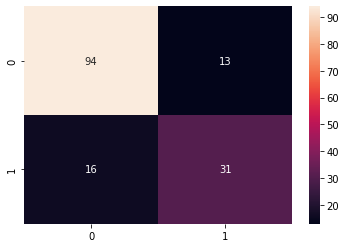

In [ ]:
# Confusion matrix - To check how many are correct or wrong 
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True)

In [ ]:
print("Correct:",sum(knn_y_pred==y_test))
print("Incorrect : ",sum(knn_y_pred != y_test))

Correct: 125
Incorrect :  29


***Support Vector Machine***

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.80


***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(classifier.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(classifier.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.766


***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.764
Accuracy on test set: 0.760


***Naive Bias Classifier***

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)
print("Accuracy on training set: {:.3f}".format(nb_classifier.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb_classifier.score(x_test, y_test)))

Accuracy on training set: 0.764
Accuracy on test set: 0.779


# **Exporting ML Model**

In [ ]:
import pickle 
pickle.dump(classifier, open('diabetes_model.pkl', 'wb'))
pickle.dump(sc,open('sc.pkl','wb'))

# **REAL TIME EXECUTION**

In [ ]:
glucose=int(input("GLUCOSE:"))
insulin=int(input("INSULIN:"))
bmi=float(input("BMI:"))
#DiabetesPedigreeFunction as dpf
dpf=float(input("DiabetesPedigreeFunction:"))
age=int(input("AGE:"))

input_data = [glucose,insulin,bmi,dpf,age]
final_data = [np.array(input_data)]


prediction = classifier.predict( sc.transform(final_data) )
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

#Example  for Diabetic                 133,    0,    32.9,   0.270,     39
#Example for Non-Diabetic           44,     0,    25.0,   0.587,     36